<a href="https://colab.research.google.com/github/suleman84/Malaria-Project/blob/master/DenseNet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_path = 'gdrive/My Drive/cell-imgs/'

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import sys
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.preprocessing import image
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, AveragePooling2D
import os

Using TensorFlow backend.


In [0]:
parapath = "gdrive/My Drive/cell-imgs/Parasitized/"
uninpath = "gdrive/My Drive/cell-imgs/Uninfected/"
parastized = os.listdir(parapath)
uninfected = os.listdir(uninpath)

In [0]:
data = []
label = []
for para in parastized:
    try:
        img = image.load_img(parapath + para, target_size=(128, 128))
        x = image.img_to_array(img)
        data.append(x)
        label.append(1)
    except:
        print("Can't add "+para+" in the dataset")
for unin in uninfected:
    try:
        img = image.load_img(uninpath + unin, target_size=(128, 128))
        x = image.img_to_array(img)
        data.append(x)
        label.append(0)
    except:
         print("Can't add "+unin+" in the dataset")
img = parapath + para 

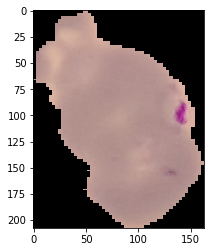

In [6]:
img = plt.imread(img)
plt.imshow(img)

In [0]:
data = np.array(data)
label = np.array(label)

In [8]:
print(sys.getsizeof(data))
print(data.shape)

402653328
(2048, 128, 128, 3)


In [9]:
from keras.utils import to_categorical
label = to_categorical(label)
print(label.shape)

(2048, 2)


In [0]:
from keras.applications import DenseNet121
from keras.layers import Flatten, Dropout, GlobalAveragePooling2D, Dense
from keras.models import Sequential

In [0]:
data = data/255
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size = 0.1,random_state=0)

In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [13]:
modelone = DenseNet121(weights="imagenet", include_top = False, input_shape=(128,128,3))

W0618 15:25:22.747992 140196510689152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 15:25:22.793265 140196510689152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 15:25:22.829707 140196510689152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 15:25:22.883981 140196510689152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0618 15:25:22.885237 1401965106

29089792/29084464 [==============================] - 1s 0us/step


In [14]:
modelone.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [15]:
model = Sequential()
model.add(modelone)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.summary()

W0618 15:25:55.248661 140196510689152 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 7,039,554
Trainable params: 6,955,906
Non-trainable params: 83,648
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

W0618 15:25:55.299690 140196510689152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0618 15:25:55.338787 140196510689152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
output = model.fit(x_train, y_train,epochs=50, batch_size=64)

Epoch 1/50
1843/1843 [==============================] - 774s 420ms/step - loss: 0.2484 - acc: 0.9080 - f1_m: 0.9072 - precision_m: 0.9092 - recall_m: 0.9056
Epoch 2/50
1843/1843 [==============================] - 742s 403ms/step - loss: 0.1170 - acc: 0.9582 - f1_m: 0.9583 - precision_m: 0.9569 - recall_m: 0.9598
Epoch 3/50
1843/1843 [==============================] - 756s 410ms/step - loss: 0.0770 - acc: 0.9740 - f1_m: 0.9740 - precision_m: 0.9746 - recall_m: 0.9734
Epoch 4/50
1843/1843 [==============================] - 747s 405ms/step - loss: 0.0763 - acc: 0.9702 - f1_m: 0.9701 - precision_m: 0.9707 - recall_m: 0.9696
Epoch 5/50
1843/1843 [==============================] - 727s 394ms/step - loss: 0.0482 - acc: 0.9851 - f1_m: 0.9851 - precision_m: 0.9848 - recall_m: 0.9853
Epoch 6/50
1843/1843 [==============================] - 734s 398ms/step - loss: 0.0520 - acc: 0.9824 - f1_m: 0.9824 - precision_m: 0.9826 - recall_m: 0.9821
Epoch 7/50
1843/1843 [==============================] - 72

In [18]:
preds = model.evaluate(x = x_test,y = y_test)
print("Test Accuracy : %.2f%%" % (preds[1]*100))
print("Test F1-Score : %.2f%%" % (preds[2]*100))
print("Test Percision: %.2f%%" % (preds[3]*100))
print("Test Recall   : %.2f%%" % (preds[4]*100))

205/205 [==============================] - 27s 131ms/step
Test Accuracy : 98.05%
Test F1-Score : 98.05%
Test Percision: 98.08%
Test Recall   : 98.05%
